### Objective: Make a model to predict the app rating, with other information about the app provided.

PROBLEM: Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

ANALYSIS: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

C:\Users\SarahRana\OneDrive - JCW Resourcing\Documents\Training Session docs


In [3]:
absolutepath = os.path.abspath('googleplaystore.csv')
print(absolutepath)

C:\Users\SarahRana\OneDrive - JCW Resourcing\Documents\Training Session docs\googleplaystore.csv


In [4]:
df=pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Preprocessing

In [7]:
df.isnull().sum() # finding the number of null values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.dropna(inplace=True) # dropping rows that contain these null values 

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [11]:
df['Size/Kb'] = [sub.replace('k', "").replace('M', "").replace('Varies with device',"").strip() for sub in df.Size]
df['Size/Kb']=pd.to_numeric(df['Size/Kb'])

In [12]:
df.Size.str.contains('M')

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9360, dtype: bool

In [13]:
# multiplying value by 1000 in the new column ('Size/Kb') if the value was in Mb in the previous one ('Size') 
df.loc[df.Size.str.contains('M'), ['Size/Kb']] = df['Size/Kb'] * 1000

In [14]:
# making the changes with Size column inplace 
# df['Size'] = [sub.replace('k', "").replace('Varies with device',"").strip() for sub in df.Size]
# df['Size'] = df.Size.apply( lambda x: float(str(x).replace('M', "").strip())*1000 if 'M' in str(x) else x)

In [15]:
df['Size/Kb'].value_counts()

14000.0    165
12000.0    161
15000.0    159
11000.0    159
13000.0    157
          ... 
383.0        1
454.0        1
812.0        1
442.0        1
619.0        1
Name: Size/Kb, Length: 411, dtype: int64

In [16]:
df.Reviews=pd.to_numeric(df.Reviews) # convert Reviews datatype to numeric 

In [17]:
# remove + and , from values in Installs column and changing Installs datatype to integer 
df['Installs'] = [sub.replace('+', "").replace(',', "").strip() for sub in df.Installs]
df.Installs=df.Installs.astype(int)

In [18]:
# remove $ and changing Price datatype to inumeric 
df.Price=[sub.replace('$', "").strip() for sub in df.Price]
df.Price=pd.to_numeric(df.Price)

In [19]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size/Kb           float64
dtype: object

In [20]:
# drop the rows that have a average rating outside 1-5 range
df.drop(df[(df.Rating < 1) | (df.Rating > 5)].index, inplace=True)

In [21]:
df.loc[(df.Rating < 1) | (df.Rating > 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size/Kb


In [22]:
# drop records where Reviews is more than installs.
df.loc[(df.Reviews) > (df.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size/Kb
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,25000.0
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,NaN
5917,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20000.0
6700,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,19000.0
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,6100.0
8591,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up,4200.0
10697,Mu.F.O.,GAME,5.0,2,16M,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up,16000.0


In [23]:
df.drop(df[(df.Reviews) > (df.Installs)].index, inplace=True)

In [24]:
# drop records for free apps with price >0.
df.loc[((df.Type)=='Free') & ((df.Price) > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size/Kb


#### Univariate Analysis

In [25]:
df.describe()

,Rating,Reviews,Installs,Price,Size/Kb
count,9353.000000,9.353000e+03,9.353000e+03,9353.000000,7717.000000
mean,4.191254,5.147606e+05,1.792215e+07,0.961467,22976.614293
std,0.515010,3.146169e+06,9.129920e+07,15.827539,23456.770600
min,1.000000,1.000000e+00,5.000000e+00,0.000000,8.500000
25%,4.000000,1.870000e+02,1.000000e+04,0.000000,5300.000000
50%,4.300000,5.967000e+03,5.000000e+05,0.000000,14000.000000
75%,4.500000,8.174700e+04,5.000000e+06,0.000000,33000.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100000.000000


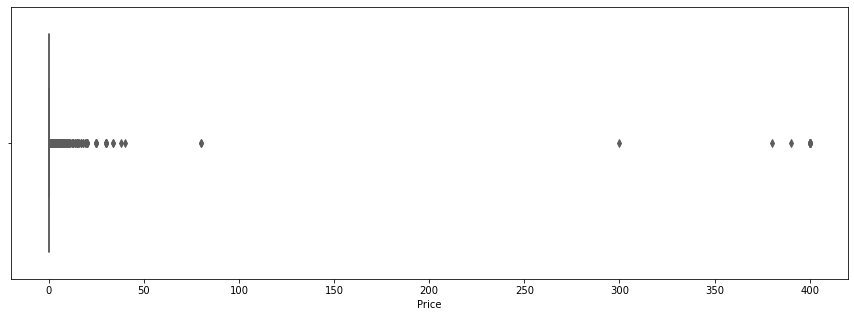

In [26]:
# Boxplot for Price
plt.figure(figsize= (15, 5))
sns.boxplot(x = 'Price', data = df,color = 'mediumaquamarine',)
plt.show()

The usual price of most paid apps and games on the Play Store is around 0.99 to 6.99 dollars , though max limit is 400. The boxplot shows many outliers.

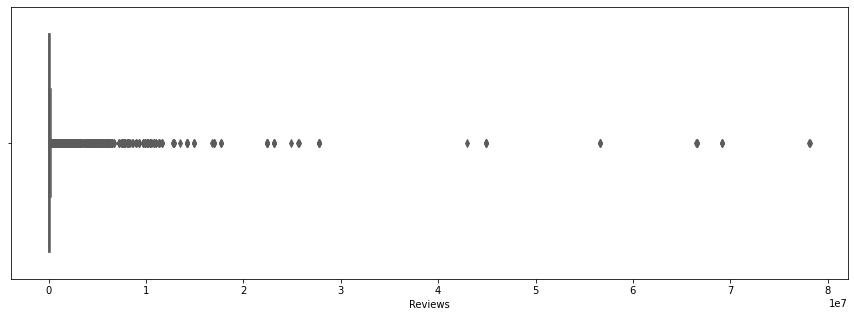

In [27]:
# Boxplot for Reviews
plt.figure(figsize= (15, 5))
sns.boxplot(x = 'Reviews', data = df,color = 'mediumaquamarine',)
plt.show()

The boxplot shows extreme outliers where reviews exceed 400,000,000 - this can be very unrealistic for the average number of reviews across apps on the playstore.

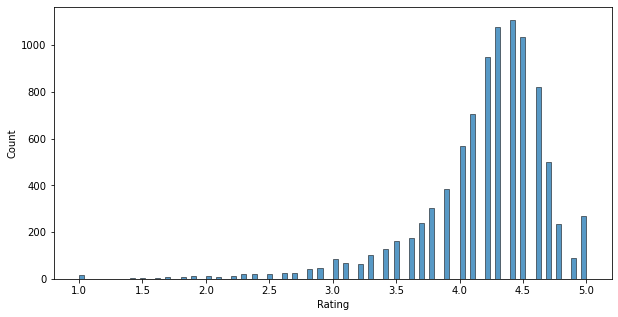

In [28]:
# Histogram for rating 
plt.figure(figsize= (10,5))
sns.histplot(x = 'Rating', data = df, bins = 100)
plt.show()

Ratings are distributed towards higher scores, showing a negative skew. The chart also shows an outlier for ratings of 1.

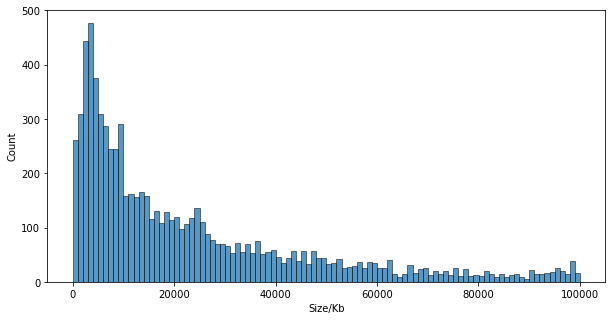

In [29]:
# Histogram for size
plt.figure(figsize= (10,5))
sns.histplot(x = 'Size/Kb', data = df, bins = 100)
plt.show()

Size is distributed towards lower Kb, showing a positive skew. No outliers can be seen in this chart.

#### Outlier Treatment

In [30]:
df.loc[(df.Price>= 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size/Kb
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,1500.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,26000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7300.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,1800.0
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,8700.0
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,2600.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4700.0
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,2900.0
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,22000.0
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,965.0


In [31]:
# drop records with price above $200
df.drop(df[(df.Price) >= 200].index, inplace=True)

In [32]:
# drop records with more than 2M reviews 
df.drop(df[(df.Reviews) > 2000000].index, inplace=True)

In [33]:
df.loc[(df.Reviews> 2000000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size/Kb


In [34]:
# percentiles of Installs column
df.Installs.describe()

count    8.885000e+03
mean     6.267379e+06
std      3.539960e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [35]:
df.Installs.quantile([0.10,0.25,0.50,0.70,0.90,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [36]:
# 90% of Installs occur below 10M & 70% occurs below 1M, therefore an appropriate cutoff value will be 5M.
df.drop(df[(df.Installs) >= 5000000].index, inplace=True)


#### Bivariate Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6506 non-null   object 
 1   Category        6506 non-null   object 
 2   Rating          6506 non-null   float64
 3   Reviews         6506 non-null   int64  
 4   Size            6506 non-null   object 
 5   Installs        6506 non-null   int32  
 6   Type            6506 non-null   object 
 7   Price           6506 non-null   float64
 8   Content Rating  6506 non-null   object 
 9   Genres          6506 non-null   object 
 10  Last Updated    6506 non-null   object 
 11  Current Ver     6506 non-null   object 
 12  Android Ver     6506 non-null   object 
 13  Size/Kb         5954 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 737.0+ KB


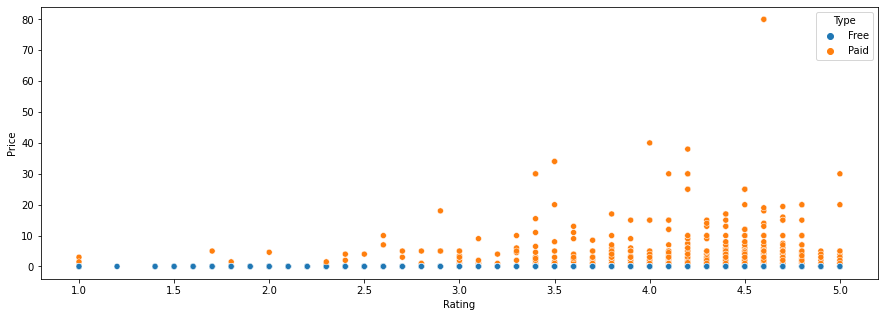

In [62]:
# Ratings vs Price
plt.figure(figsize = (15,5))
sns.scatterplot(x='Rating', y='Price', hue = 'Type', data = df )
plt.show()

Higher rated apps tend to have a higher price.

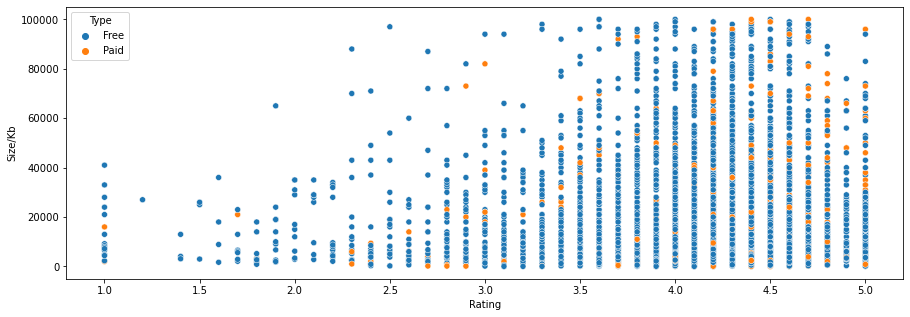

In [39]:
# Ratings vs Size
plt.figure(figsize = (15,5))
sns.scatterplot(x='Rating', y='Size/Kb', hue = 'Type', data = df )
plt.show()

Majority of heavy apps are rated highly. However, as most apps on google playstore are less than 35000Kb, in general small sized apps get better ratings. 

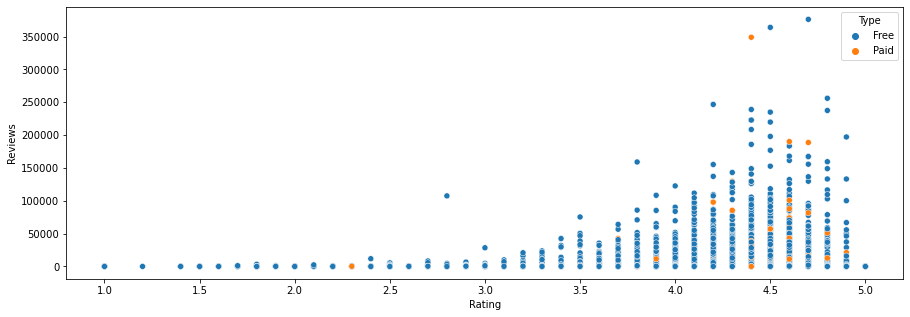

In [40]:
# Ratings vs Reviews
plt.figure(figsize = (15,5))
sns.scatterplot(x='Rating', y='Reviews', hue = 'Type', data = df )
plt.show()

Apps with a high number of reviews (above 150000) are rated highly. However, highly rated apps can have reviews between the 0-100000.

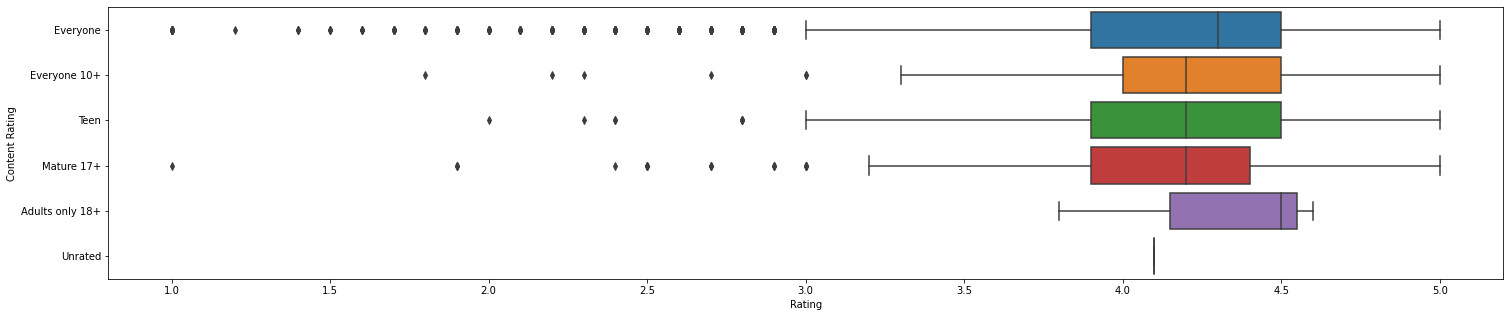

In [41]:
# Ratings vs Content Rating 
plt.figure(figsize = (25,5))
sns.boxplot(x = 'Rating', y = 'Content Rating', data = df)
plt.show()

Generally, adults only 18+ apps are liked more than others as it has a smaller IQR compared to others. This means that majority of these apps gain higher ratings. 

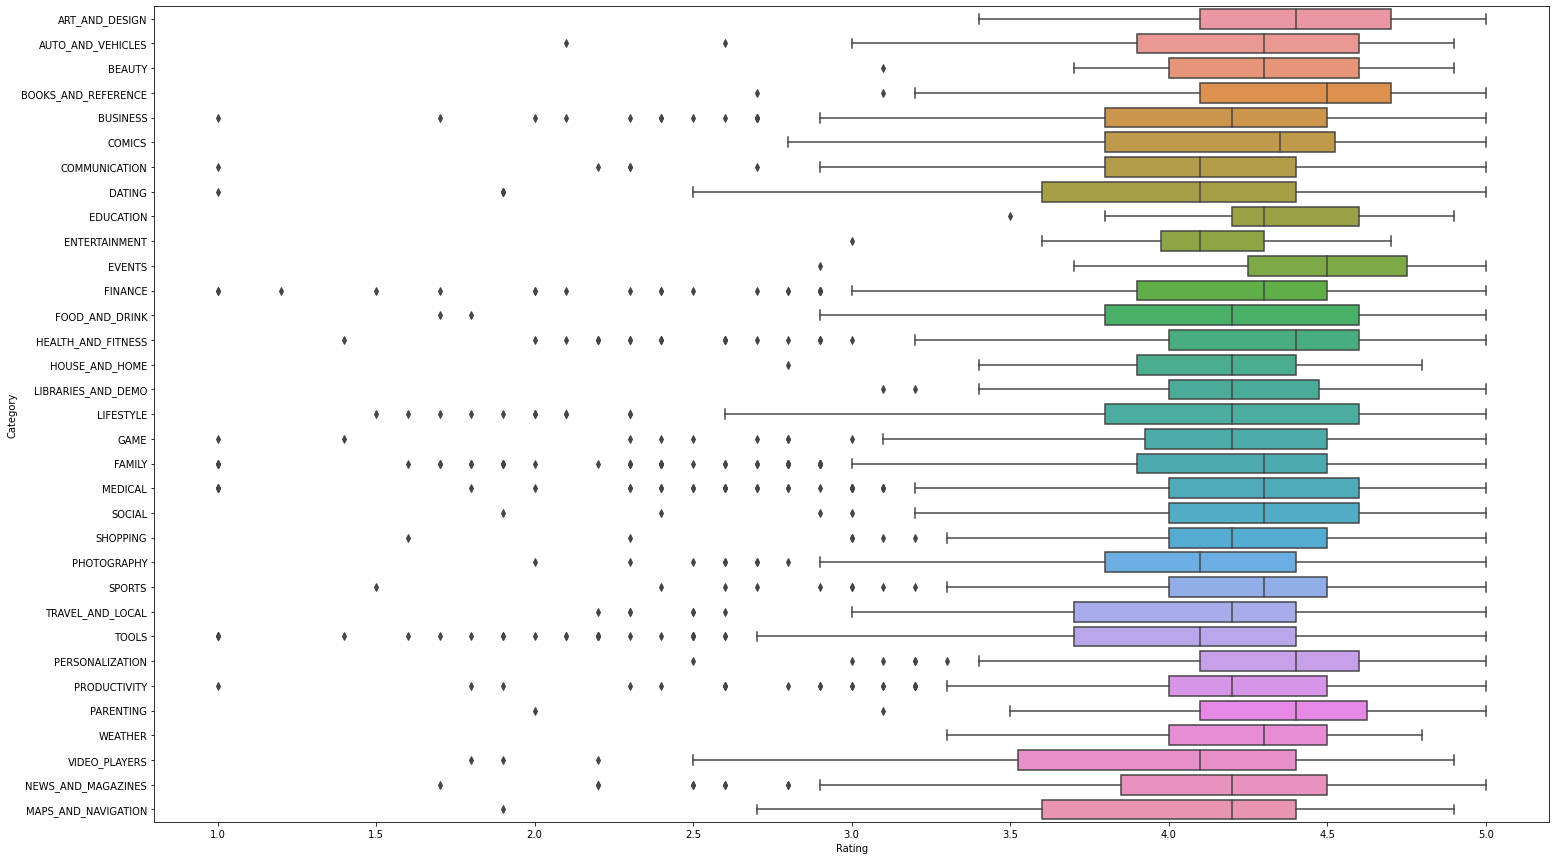

In [42]:
# Ratings vs Category
plt.figure(figsize = (25,15))
sns.boxplot(x = 'Rating', y = 'Category', data = df)
plt.show()

The most popular app Genre is Events as this has the highest mean and with only 1 outlier. Additionaly, the range of data and IQR is less than majority of the other genres. 

#### Data Preprocessing 

In [43]:
inp1=df.copy()

In [44]:
# reduce skew of Reviews and Installs 
inp1.Reviews=inp1.Reviews.apply(lambda x:np.log1p(x))
inp1.Installs=inp1.Installs.apply(lambda x:np.log1p(x))

In [45]:
# drop App, Last Updated, Current Ver, and Android Ver columns
inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver','Size'], inplace=True)

In [46]:
inp1 

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Size/Kb
0,ART_AND_DESIGN,4.1,5.075174,9.210440,Free,0.0,Everyone,Art & Design,19000.0
1,ART_AND_DESIGN,3.9,6.875232,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,14000.0
4,ART_AND_DESIGN,4.3,6.875232,11.512935,Free,0.0,Everyone,Art & Design;Creativity,2800.0
5,ART_AND_DESIGN,4.4,5.123964,10.819798,Free,0.0,Everyone,Art & Design,5600.0
6,ART_AND_DESIGN,3.8,5.187386,10.819798,Free,0.0,Everyone,Art & Design,19000.0
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,3.806662,6.908755,Free,0.0,Everyone,Books & Reference,619.0
10834,FAMILY,4.0,2.079442,6.216606,Free,0.0,Everyone,Education,2600.0
10836,FAMILY,4.5,3.663562,8.517393,Free,0.0,Everyone,Education,53000.0
10837,FAMILY,5.0,1.609438,4.615121,Free,0.0,Everyone,Education,3600.0


In [47]:
# get dummy columns for Category, Genres, and Content Rating
inp2 = pd.get_dummies(data=inp1, columns=['Category', 'Genres','Content Rating'])

In [48]:
inp2

,Rating,Reviews,Installs,Type,Price,Size/Kb,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,9.210440,Free,0.0,19000.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,13.122365,Free,0.0,14000.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,11.512935,Free,0.0,2800.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,10.819798,Free,0.0,5600.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,10.819798,Free,0.0,19000.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.8,3.806662,6.908755,Free,0.0,619.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
10834,4.0,2.079442,6.216606,Free,0.0,2600.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,8.517393,Free,0.0,53000.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,5.0,1.609438,4.615121,Free,0.0,3600.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
inp2.Type = inp2.Type.map({'Free': 0, 'Paid': 1})
inp2["Size/Kb"].fillna(0, inplace = True)

#### Machine Learning Model

In [50]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

In [51]:
df_train, df_test = split(inp2, train_size= 0.70, random_state=12)

In [52]:
lr = LinearRegression()

In [53]:
X = df_train.drop(columns = 'Rating')
y = df_train.Rating
lr.fit(X, y)

LinearRegression()

In [54]:
#lr.score(X,y)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
# train set R2 score 
r2_score(y,lr.predict(X))

0.1495280256626247

In [57]:
# prediction of test set
y_pred = lr.predict(df_test.drop(columns = 'Rating'))

In [58]:
# test set R2 score
r2_score(df_test.Rating,y_pred)

0.11324999939935432

In [59]:
#lr.score(df_test.drop(columns = 'Rating'),df_test.Rating)

In [60]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_true = df_test.Rating, y_pred=y_pred, squared = False))

Mean squared error: 0.55
